### **Import libraries**

In [ ]:
import pandas as pd
!pip install wget
import os
import wget
import requests
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 200)

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=91b399efc8b37b0f7d003643c40405f625b90550fff636bdb7df7bc945bae38b
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


# 1. John Hopkins data collection and cleaning

### **Links to the time series data from JH repository on Confirmed cases, Deaths and Recovery**

### **Download and read the .csv files**

In [ ]:
urls = ['https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',
       'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv',
       'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv']

path = os.getcwd() # get the current directory

for url in urls:
    filename = path + '/' + os.path.basename(url) # get the full path of the file
    if os.path.exists(filename):
        os.remove(filename) # if exist, remove it directly
    wget.download(url, out=filename) # download it to the specific path.

In [ ]:
confirmed_df = pd.read_csv('time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('time_series_covid19_recovered_global.csv')

In [ ]:
# check size of the 3 datasets
print([confirmed_df.shape, deaths_df.shape, recovered_df.shape])


[(266, 262), (266, 262), (253, 262)]


In [ ]:
recovered_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '9/26/20', '9/27/20', '9/28/20', '9/29/20', '9/30/20', '10/1/20',
       '10/2/20', '10/3/20', '10/4/20', '10/5/20'],
      dtype='object', length=262)

In [ ]:
deaths_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '9/26/20', '9/27/20', '9/28/20', '9/29/20', '9/30/20', '10/1/20',
       '10/2/20', '10/3/20', '10/4/20', '10/5/20'],
      dtype='object', length=262)

In [ ]:
confirmed_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '9/26/20', '9/27/20', '9/28/20', '9/29/20', '9/30/20', '10/1/20',
       '10/2/20', '10/3/20', '10/4/20', '10/5/20'],
      dtype='object', length=262)

In [ ]:
confirmed_df[confirmed_df['Country/Region'] == 'Colombia']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20
89,NaN,Colombia,4.5709,-74.2973,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,581995,590492,599884,607904,615094,624026,633321,641574,650063,658456,666521,671848,671533,686851,694664,702088,708964,716319,721892,728590,736377,743945,750471,758398,765076,770435,777537,784268,790823,798317,806038,813056,818203,824042,829679,835339,841532,848147,855052,862158


### **The first 4 colums of each dataset have the same variable so we use them to merge all 3 datasets**

In [ ]:
dates = confirmed_df.columns[4:]

confirmed_df_long = confirmed_df.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Confirmed')

deaths_df_long = deaths_df.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Deaths')

recovered_df_long = recovered_df.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Recovered')

In [ ]:
dates

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '9/25/20', '9/26/20', '9/27/20', '9/28/20', '9/29/20', '9/30/20',
       '10/1/20', '10/2/20', '10/3/20', '10/4/20'],
      dtype='object', length=257)

In [ ]:
confirmed_df_long

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
68357,NaN,West Bank and Gaza,31.952200,35.233200,10/4/20,41498
68358,NaN,Western Sahara,24.215500,-12.885800,10/4/20,10
68359,NaN,Yemen,15.552727,48.516388,10/4/20,2041
68360,NaN,Zambia,-13.133897,27.849332,10/4/20,15052


In [ ]:
deaths_df_long

,Province/State,Country/Region,Lat,Long,Date,Deaths
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
68357,NaN,West Bank and Gaza,31.952200,35.233200,10/4/20,330
68358,NaN,Western Sahara,24.215500,-12.885800,10/4/20,1
68359,NaN,Yemen,15.552727,48.516388,10/4/20,591
68360,NaN,Zambia,-13.133897,27.849332,10/4/20,333


In [ ]:
recovered_df_long

,Province/State,Country/Region,Lat,Long,Date,Recovered
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
65016,NaN,West Bank and Gaza,31.952200,35.233200,10/4/20,34698
65017,NaN,Western Sahara,24.215500,-12.885800,10/4/20,8
65018,NaN,Yemen,15.552727,48.516388,10/4/20,1320
65019,NaN,Zambia,-13.133897,27.849332,10/4/20,14187


In [ ]:
# Merge the 3 datasets 

full_table = confirmed_df_long.merge(
  right=deaths_df_long, 
  how='left',
  on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long'])# Merging full_table and recovered_df_long

full_table = full_table.merge(
  right=recovered_df_long, 
  how='left',
  on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long'])

In [ ]:
full_table.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68362 entries, 0 to 68361
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  20817 non-null  object 
 1   Country/Region  68362 non-null  object 
 2   Lat             68362 non-null  float64
 3   Long            68362 non-null  float64
 4   Date            68362 non-null  object 
 5   Confirmed       68362 non-null  int64  
 6   Deaths          62194 non-null  float64
 7   Recovered       63479 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 4.7+ MB


In [ ]:
# trasnform from string to date the "Date" column
full_table['Date'] = pd.to_datetime(full_table['Date'])

### **Check NaN in the full dataset**

In [ ]:
full_table.isna().sum()

Province/State    47545
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths             6168
Recovered          4883
dtype: int64

In [ ]:
# We observe a large number of NaN in death and Recovered reports...
# In order to make the datste more easy to work with, we remove the NaNs from "Deaths" and "Recovered" and...
# replace them with 0 

full_table['Deaths'] = full_table['Deaths'].fillna(0)
full_table['Recovered'] = full_table['Recovered'].fillna(0)

### **Remove cruise ships data**
 #### We also observed that there is some data from the cruise ships that make it difficult to fit in in the Country category, so we excluded from our anaysis

In [ ]:
# select the ships rows
ship_rows = full_table['Province/State'].str.contains('Grand Princess') | full_table['Province/State'].str.contains('Diamond Princess') | full_table['Country/Region'].str.contains('Diamond Princess') | full_table['Country/Region'].str.contains('MS Zaandam')

In [ ]:
ship_rows

0        False
1        False
2        False
3        False
4        False
         ...  
68357    False
68358    False
68359    False
68360    False
68361    False
Length: 68362, dtype: bool

In [ ]:
#full_table[full_table['Province/State'] == 'Grand Princess']

In [ ]:
full_table = full_table[~(ship_rows)] # the '~' operator negate the selections

In [ ]:
full_table

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0.0,0.0
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0.0,0.0
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0.0,0.0
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0.0,0.0
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0.0,0.0
...,...,...,...,...,...,...,...,...
68357,NaN,West Bank and Gaza,31.952200,35.233200,2020-10-04,41498,330.0,34698.0
68358,NaN,Western Sahara,24.215500,-12.885800,2020-10-04,10,1.0,8.0
68359,NaN,Yemen,15.552727,48.516388,2020-10-04,2041,0.0,1320.0
68360,NaN,Zambia,-13.133897,27.849332,2020-10-04,15052,333.0,14187.0


### **Add new colum for active cases**
Below we compute the active cases by substracting the number of death and recovered to the confirmed cases.

In [ ]:
# Active Case = confirmed - deaths - recovered
full_table['Active'] = full_table['Confirmed'] - full_table['Deaths'] - full_table['Recovered']
full_table

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0.0,0.0,0.0
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0.0,0.0,0.0
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0.0,0.0,0.0
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0.0,0.0,0.0
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
68357,NaN,West Bank and Gaza,31.952200,35.233200,2020-10-04,41498,330.0,34698.0,6470.0
68358,NaN,Western Sahara,24.215500,-12.885800,2020-10-04,10,1.0,8.0,1.0
68359,NaN,Yemen,15.552727,48.516388,2020-10-04,2041,0.0,1320.0,721.0
68360,NaN,Zambia,-13.133897,27.849332,2020-10-04,15052,333.0,14187.0,532.0


We agregate the data by Country and Date (by means of grouping) and calculate de sum of the cases

In [ ]:
full_grouped = full_table.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
full_grouped

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Date,Country/Region,Confirmed,Deaths,Recovered,Active
0,2020-01-22,Afghanistan,0,0.0,0.0,0.0
1,2020-01-22,Albania,0,0.0,0.0,0.0
2,2020-01-22,Algeria,0,0.0,0.0,0.0
3,2020-01-22,Andorra,0,0.0,0.0,0.0
4,2020-01-22,Angola,0,0.0,0.0,0.0
...,...,...,...,...,...,...
47797,2020-10-04,West Bank and Gaza,41498,330.0,34698.0,6470.0
47798,2020-10-04,Western Sahara,10,1.0,8.0,1.0
47799,2020-10-04,Yemen,2041,0.0,1320.0,721.0
47800,2020-10-04,Zambia,15052,333.0,14187.0,532.0


In [ ]:
#rename the "Country/Region" variable
full_grouped.rename(columns = {'Country/Region' : 'Country_Region'}, inplace = True)
full_grouped

,Date,Country_Region,Confirmed,Deaths,Recovered,Active
0,2020-01-22,Afghanistan,0,0.0,0.0,0.0
1,2020-01-22,Albania,0,0.0,0.0,0.0
2,2020-01-22,Algeria,0,0.0,0.0,0.0
3,2020-01-22,Andorra,0,0.0,0.0,0.0
4,2020-01-22,Angola,0,0.0,0.0,0.0
...,...,...,...,...,...,...
47797,2020-10-04,West Bank and Gaza,41498,330.0,34698.0,6470.0
47798,2020-10-04,Western Sahara,10,1.0,8.0,1.0
47799,2020-10-04,Yemen,2041,0.0,1320.0,721.0
47800,2020-10-04,Zambia,15052,333.0,14187.0,532.0


In [ ]:
# compute the number of countries registered in the covide dataset
full_grouped['Country_Region'].unique().size

186

### **Extract metadata for contry codes**

In [ ]:
covid_metadata_countries = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv",
                                      usecols = ['Country_Region', 'Province_State', 'iso3', 'Population'])
covid_metadata_countries.columns

Index(['iso3', 'Province_State', 'Country_Region', 'Population'], dtype='object')

In [ ]:
covid_metadata_countries.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4153 entries, 0 to 4152
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   iso3            4151 non-null   object 
 1   Province_State  3965 non-null   object 
 2   Country_Region  4153 non-null   object 
 3   Population      4012 non-null   float64
dtypes: float64(1), object(3)
memory usage: 129.9+ KB


### **Remove the cruise ships information that does not contain relevant metadata on country codes**

In [ ]:
# select from columns 'Country_Region' the names 'Diamond Princess'and 'MS Zaandam'
ship_metadata = covid_metadata_countries['Country_Region'].str.contains('Diamond Princess') | covid_metadata_countries['Country_Region'].str.contains('MS Zaandam')
ship_metadata
covid_metadata_countries = covid_metadata_countries[~(ship_metadata)]

### **Summarize the population by country in the metadata file**

In [ ]:
#my_covid_variables = ['Confirmed', 'Deaths', 'Recovered', 'Active']
code_vars = ['Country_Region', 'iso3']

#full_table.groupby(['Date', 'Country/Region'])[my_covid_variables].sum().reset_index()
country_population = covid_metadata_countries.groupby(code_vars)['Population'].sum().reset_index()

In [ ]:
country_population['Country_Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada',
       'Guatemala', 'Guinea', 'Guinea-Bissau'

In [ ]:
country_population[country_population['iso3'] == 'ABW']

,Country_Region,iso3,Population
134,Netherlands,ABW,106766.0


In [ ]:
country_population[country_population['Country_Region'].duplicated()]

,Country_Region,iso3,Population
37,China,HKG,7496988.0
38,China,MAC,649342.0
50,Denmark,FRO,48865.0
51,Denmark,GRL,56772.0
66,France,FRA,65273512.0
67,France,GLP,400127.0
68,France,GUF,298682.0
69,France,MAF,38659.0
70,France,MTQ,375265.0
71,France,MYT,272813.0


### **Merge country code with Covid datasets**

In [ ]:
full_grouped_ccode = pd.merge(country_population, full_grouped, how = 'left')
full_grouped_ccode

,Country_Region,iso3,Population,Date,Confirmed,Deaths,Recovered,Active
0,Afghanistan,AFG,38928341.0,2020-01-22,0,0.0,0.0,0.0
1,Afghanistan,AFG,38928341.0,2020-01-23,0,0.0,0.0,0.0
2,Afghanistan,AFG,38928341.0,2020-01-24,0,0.0,0.0,0.0
3,Afghanistan,AFG,38928341.0,2020-01-25,0,0.0,0.0,0.0
4,Afghanistan,AFG,38928341.0,2020-01-26,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
56021,Zimbabwe,ZWE,14862927.0,2020-09-30,7838,228.0,6303.0,1307.0
56022,Zimbabwe,ZWE,14862927.0,2020-10-01,7850,228.0,6312.0,1310.0
56023,Zimbabwe,ZWE,14862927.0,2020-10-02,7858,228.0,6322.0,1308.0
56024,Zimbabwe,ZWE,14862927.0,2020-10-03,7885,228.0,6327.0,1330.0


In [ ]:
full_grouped_ccode.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56026 entries, 0 to 56025
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country_Region  56026 non-null  object        
 1   iso3            56026 non-null  object        
 2   Population      56026 non-null  float64       
 3   Date            56026 non-null  datetime64[ns]
 4   Confirmed       56026 non-null  int64         
 5   Deaths          56026 non-null  float64       
 6   Recovered       56026 non-null  float64       
 7   Active          56026 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 3.8+ MB


In [ ]:
full_grouped_ccode.rename(columns = {'iso3' : 'CountryCode'}, inplace = True)


In [ ]:
full_grouped_ccode.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56026 entries, 0 to 56025
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country_Region  56026 non-null  object        
 1   CountryCode     56026 non-null  object        
 2   Population      56026 non-null  float64       
 3   Date            56026 non-null  datetime64[ns]
 4   Confirmed       56026 non-null  int64         
 5   Deaths          56026 non-null  float64       
 6   Recovered       56026 non-null  float64       
 7   Active          56026 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 3.8+ MB


# 2. Oxford Stringency index data collection, cleaning and merging

In [ ]:
my_string_columns = ["Date", "CountryCode", "CountryName", "StringencyIndex", "RegionName", "RegionCode"] # exclude for now the "CountryName" variable
str_url = "https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv"
stringency_raw_dataset = pd.read_csv(str_url, usecols = my_string_columns)
stringency_raw_dataset.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67518 entries, 0 to 67517
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CountryName      67518 non-null  object 
 1   CountryCode      67518 non-null  object 
 2   RegionName       15624 non-null  object 
 3   RegionCode       15624 non-null  object 
 4   Date             67518 non-null  int64  
 5   StringencyIndex  65076 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 3.1+ MB


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### **Selecting national data only ( exclude regional data) read documentation in this link why -> "https://github.com/OxCGRT/covid-policy-tracker"**

In [ ]:
stringe_natio_dataset = stringency_raw_dataset[pd.isnull(stringency_raw_dataset['RegionCode'])]

In [ ]:
stringe_natio_dataset['CountryCode'].unique().size

186

In [ ]:
# remove columns with Regional information
stringe_natio_dataset = stringe_natio_dataset[my_string_columns[:4]]

In [ ]:
stringe_natio_dataset

,Date,CountryCode,CountryName,StringencyIndex
0,20200101,ABW,Aruba,0.0
1,20200102,ABW,Aruba,0.0
2,20200103,ABW,Aruba,0.0
3,20200104,ABW,Aruba,0.0
4,20200105,ABW,Aruba,0.0
...,...,...,...,...
67513,20201001,ZWE,Zimbabwe,NaN
67514,20201002,ZWE,Zimbabwe,NaN
67515,20201003,ZWE,Zimbabwe,NaN
67516,20201004,ZWE,Zimbabwe,NaN


In [ ]:
# It looks like the country codes are not the same number in covid df as compared with stringe df  
stringe_natio_dataset['CountryCode'].unique().size

186

In [ ]:
full_grouped_ccode['CountryCode'].unique().size

218

#### **The list below shows the Countries/region/dependencies which have not information regarding stringency index**

In [ ]:
# finding What is not present in the stringency dataset
full_grouped_ccode[~full_grouped_ccode['CountryCode'].isin(stringe_natio_dataset['CountryCode'])][['CountryCode', 'Country_Region']].drop_duplicates()

,CountryCode,Country_Region
1285,ATG,Antigua and Barbuda
1799,ARM,Armenia
2827,BHS,Bahamas
10280,COM,Comoros
12850,FRO,Denmark
14906,GNQ,Equatorial Guinea
16705,BLM,France
17219,GLP,France
17476,GUF,France
17733,MAF,France


In [ ]:
## you can filter this countries for joining the thos datasets
full_grouped_ccode_filtered = full_grouped_ccode[full_grouped_ccode['CountryCode'].isin(stringe_natio_dataset['CountryCode'])]

In [ ]:
full_grouped_ccode_filtered.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46517 entries, 0 to 56025
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country_Region  46517 non-null  object        
 1   CountryCode     46517 non-null  object        
 2   Population      46517 non-null  float64       
 3   Date            46517 non-null  datetime64[ns]
 4   Confirmed       46517 non-null  int64         
 5   Deaths          46517 non-null  float64       
 6   Recovered       46517 non-null  float64       
 7   Active          46517 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 3.2+ MB


### Fixing the date format in the stringency dataset

In [ ]:
#stringency_raw_dataset.info(verbose = True)
stringency_raw_dataset['Date'] = pd.to_datetime(stringency_raw_dataset['Date'], format = '%Y%m%d')

In [ ]:
stringency_raw_dataset.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67518 entries, 0 to 67517
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CountryName      67518 non-null  object        
 1   CountryCode      67518 non-null  object        
 2   RegionName       15624 non-null  object        
 3   RegionCode       15624 non-null  object        
 4   Date             67518 non-null  datetime64[ns]
 5   StringencyIndex  65076 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 3.1+ MB


# 3. Joining Covid cases with Stringency index data 

In [ ]:
stringency_raw_dataset[['Date', 'CountryCode','StringencyIndex']]

,Date,CountryCode,StringencyIndex
0,2020-01-01,ABW,0.0
1,2020-01-02,ABW,0.0
2,2020-01-03,ABW,0.0
3,2020-01-04,ABW,0.0
4,2020-01-05,ABW,0.0
...,...,...,...
67513,2020-10-01,ZWE,NaN
67514,2020-10-02,ZWE,NaN
67515,2020-10-03,ZWE,NaN
67516,2020-10-04,ZWE,NaN


In [ ]:
full_grouped_ccode_filtered

,Country_Region,CountryCode,Population,Date,Confirmed,Deaths,Recovered,Active
0,Afghanistan,AFG,38928341.0,2020-01-22,0,0.0,0.0,0.0
1,Afghanistan,AFG,38928341.0,2020-01-23,0,0.0,0.0,0.0
2,Afghanistan,AFG,38928341.0,2020-01-24,0,0.0,0.0,0.0
3,Afghanistan,AFG,38928341.0,2020-01-25,0,0.0,0.0,0.0
4,Afghanistan,AFG,38928341.0,2020-01-26,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
56021,Zimbabwe,ZWE,14862927.0,2020-09-30,7838,228.0,6303.0,1307.0
56022,Zimbabwe,ZWE,14862927.0,2020-10-01,7850,228.0,6312.0,1310.0
56023,Zimbabwe,ZWE,14862927.0,2020-10-02,7858,228.0,6322.0,1308.0
56024,Zimbabwe,ZWE,14862927.0,2020-10-03,7885,228.0,6327.0,1330.0


In [ ]:
my_complete_df = pd.merge(stringency_raw_dataset[['Date', 'CountryCode','StringencyIndex']], 
                          full_grouped_ccode_filtered)

In [ ]:
my_complete_df

,Date,CountryCode,StringencyIndex,Country_Region,Population,Confirmed,Deaths,Recovered,Active
0,2020-01-22,ABW,0.0,Netherlands,106766.0,0,0.0,0.0,0.0
1,2020-01-23,ABW,0.0,Netherlands,106766.0,0,0.0,0.0,0.0
2,2020-01-24,ABW,0.0,Netherlands,106766.0,0,0.0,0.0,0.0
3,2020-01-25,ABW,0.0,Netherlands,106766.0,0,0.0,0.0,0.0
4,2020-01-26,ABW,0.0,Netherlands,106766.0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
60904,2020-09-30,ZWE,NaN,Zimbabwe,14862927.0,7838,228.0,6303.0,1307.0
60905,2020-10-01,ZWE,NaN,Zimbabwe,14862927.0,7850,228.0,6312.0,1310.0
60906,2020-10-02,ZWE,NaN,Zimbabwe,14862927.0,7858,228.0,6322.0,1308.0
60907,2020-10-03,ZWE,NaN,Zimbabwe,14862927.0,7885,228.0,6327.0,1330.0


In [ ]:
my_complete_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59472 entries, 0 to 59471
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             59472 non-null  datetime64[ns]
 1   CountryCode      59472 non-null  object        
 2   StringencyIndex  57395 non-null  float64       
 3   Country_Region   59472 non-null  object        
 4   Population       59472 non-null  float64       
 5   Confirmed        59472 non-null  int64         
 6   Deaths           59472 non-null  float64       
 7   Recovered        59472 non-null  float64       
 8   Active           59472 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 4.5+ MB


In [ ]:
my_complete_df = my_complete_df.set_index('Date')

In [ ]:
my_complete_df[my_complete_df['CountryCode'] == "COL"]

,CountryCode,StringencyIndex,Country_Region,Population,Confirmed,Deaths,Recovered,Active
Date,,,,,,,,
2020-01-22,COL,8.33,Colombia,99141018.0,0,0.0,0.0,0.0
2020-01-23,COL,8.33,Colombia,99141018.0,0,0.0,0.0,0.0
2020-01-24,COL,8.33,Colombia,99141018.0,0,0.0,0.0,0.0
2020-01-25,COL,8.33,Colombia,99141018.0,0,0.0,0.0,0.0
2020-01-26,COL,8.33,Colombia,99141018.0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2020-09-25,COL,50.93,Colombia,99141018.0,798317,25103.0,687477.0,85737.0
2020-09-26,COL,50.93,Colombia,99141018.0,806038,25296.0,700112.0,80630.0
2020-09-27,COL,50.93,Colombia,99141018.0,813056,25488.0,711472.0,76096.0


### Visualizing CHE Data

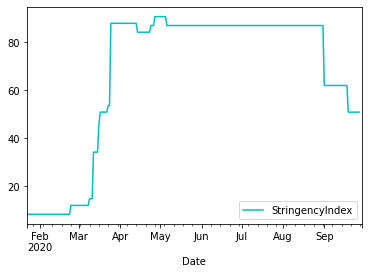

In [ ]:
CHE_covid_df = my_complete_df[my_complete_df['CountryCode'] == "COL"]
#CHE_covid_df = my_complete_df[my_complete_df['Country_Region'] == "US"]
CHE_covid_df.plot(y='StringencyIndex',kind="line",c='c')
plt.show()

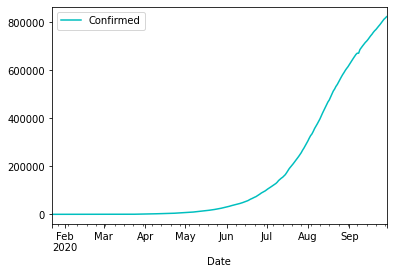

In [ ]:
CHE_covid_df.plot(y='Confirmed',kind="line",c='c')
plt.show()

CHE_covid_df.plot(y='Recovered',kind="line",c='c')
plt.show()

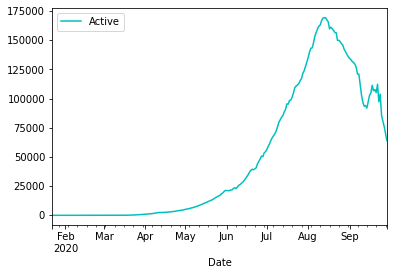

In [ ]:
CHE_covid_df.plot(y='Active',kind="line",c='c')
plt.show()

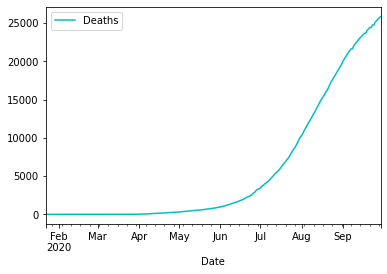

In [ ]:
CHE_covid_df.plot(y='Deaths',kind="line",c='c')
plt.show()

In [ ]:
### Note: still there are duplicates of stringency index for different countries eg. USA, GBR, etc that need to be cleaned

# 4. Socieconomical data from the WorldBank
We extract socieconomical data such is GDP and other... from the Worldbank datasets via API query request protocol.

**Note**: retrieving *GDP* and *income level* doesn't seem to be so straightforward in a single call. So may be the strategy would be to make a call for each dataset and then merge then.

In [ ]:
my_home_url = 'http://api.worldbank.org/v2/country/all/indicator/NY.GDP.MKTP.CD'
my_params = {'format' : 'json',
            'date' : '2019',
            'incomelevel' :'',
            'per_page' : '304'} # dic with the parameters of interest
r = requests.get(my_home_url, params = my_params) # make the data request

#print(r.url) # here you can print the actual url send it to the API

#remove first value (which contain info on the request)  and transform to json then to dataframe
GDP_raw_df = pd.json_normalize(r.json()[-1]) 
# take only relevant variables
GDP_raw_df = GDP_raw_df[['date','countryiso3code', 'value', 'indicator.value', 'country.value']]
GDP_raw_df

,date,countryiso3code,value,indicator.value,country.value
0,2019,ARB,2.815410e+12,GDP (current US$),Arab World
1,2019,CSS,7.629037e+10,GDP (current US$),Caribbean small states
2,2019,CEB,1.656929e+12,GDP (current US$),Central Europe and the Baltics
3,2019,EAR,1.198157e+13,GDP (current US$),Early-demographic dividend
4,2019,EAS,2.697981e+13,GDP (current US$),East Asia & Pacific
...,...,...,...,...,...
259,2019,VIR,NaN,GDP (current US$),Virgin Islands (U.S.)
260,2019,PSE,NaN,GDP (current US$),West Bank and Gaza
261,2019,YEM,NaN,GDP (current US$),"Yemen, Rep."
262,2019,ZMB,2.306472e+10,GDP (current US$),Zambia


In [ ]:
GDP_raw_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             264 non-null    object 
 1   countryiso3code  264 non-null    object 
 2   value            223 non-null    float64
 3   indicator.value  264 non-null    object 
 4   country.value    264 non-null    object 
dtypes: float64(1), object(4)
memory usage: 10.4+ KB


In [ ]:
# Extract data on Income level (Country categories)

income_url = 'http://api.worldbank.org/v2/country/all'
my_params_2 = {'format' : 'json',
              'per_page' : '304'}

r = requests.get(income_url, params = my_params_2) # make the data request

#remove first value (which contain info on the request)  and transform to json then to dataframe
income_raw_df = pd.json_normalize(r.json()[-1]) 
# take only relevant variables
income_raw_df = income_raw_df[['id', 'name', 'region.value', 'incomeLevel.id', 'incomeLevel.value']]
income_raw_df

,id,name,region.value,incomeLevel.id,incomeLevel.value
0,ABW,Aruba,Latin America & Caribbean,HIC,High income
1,AFG,Afghanistan,South Asia,LIC,Low income
2,AFR,Africa,Aggregates,NA,Aggregates
3,AGO,Angola,Sub-Saharan Africa,LMC,Lower middle income
4,ALB,Albania,Europe & Central Asia,UMC,Upper middle income
...,...,...,...,...,...
299,XZN,Sub-Saharan Africa excluding South Africa and ...,Aggregates,NA,Aggregates
300,YEM,"Yemen, Rep.",Middle East & North Africa,LIC,Low income
301,ZAF,South Africa,Sub-Saharan Africa,UMC,Upper middle income
302,ZMB,Zambia,Sub-Saharan Africa,LMC,Lower middle income


In [ ]:
# check now for different country codes

income_raw_df['id'].unique().size
income_raw_df[income_raw_df['id'].isin(GDP_raw_df['countryiso3code'])]

,id,name,region.value,incomeLevel.id,incomeLevel.value
0,ABW,Aruba,Latin America & Caribbean,HIC,High income
1,AFG,Afghanistan,South Asia,LIC,Low income
3,AGO,Angola,Sub-Saharan Africa,LMC,Lower middle income
4,ALB,Albania,Europe & Central Asia,UMC,Upper middle income
5,AND,Andorra,Europe & Central Asia,HIC,High income
...,...,...,...,...,...
298,XKX,Kosovo,Europe & Central Asia,UMC,Upper middle income
300,YEM,"Yemen, Rep.",Middle East & North Africa,LIC,Low income
301,ZAF,South Africa,Sub-Saharan Africa,UMC,Upper middle income
302,ZMB,Zambia,Sub-Saharan Africa,LMC,Lower middle income


In [ ]:
# I found out that there are 5 rows in th GDP dataset that are showing missleading country value
GDP_raw_df[~GDP_raw_df['countryiso3code'].isin(income_raw_df['id'])]

,date,countryiso3code,value,indicator.value,country.value
14,2019,,5.504537e+13,GDP (current US$),High income
26,2019,,5.212738e+11,GDP (current US$),Low income
27,2019,,6.341105e+12,GDP (current US$),Lower middle income
33,2019,,NaN,GDP (current US$),Not classified
45,2019,,2.581713e+13,GDP (current US$),Upper middle income


In [ ]:
# remove the coutry.value that are inconsistent in the GDP_raw_df:
GDP_rows_removed = GDP_raw_df['country.value'].str.contains('High income') | GDP_raw_df['country.value'].str.contains('Low income') | GDP_raw_df['country.value'].str.contains('Lower middle income') | GDP_raw_df['country.value'].str.contains('Not classified') | GDP_raw_df['country.value'].str.contains('Upper middle income')
GDP_raw_df = GDP_raw_df[~(GDP_rows_removed)]
GDP_raw_df

,date,countryiso3code,value,indicator.value,country.value
0,2019,ARB,2.815410e+12,GDP (current US$),Arab World
1,2019,CSS,7.629037e+10,GDP (current US$),Caribbean small states
2,2019,CEB,1.656929e+12,GDP (current US$),Central Europe and the Baltics
3,2019,EAR,1.198157e+13,GDP (current US$),Early-demographic dividend
4,2019,EAS,2.697981e+13,GDP (current US$),East Asia & Pacific
...,...,...,...,...,...
259,2019,VIR,NaN,GDP (current US$),Virgin Islands (U.S.)
260,2019,PSE,NaN,GDP (current US$),West Bank and Gaza
261,2019,YEM,NaN,GDP (current US$),"Yemen, Rep."
262,2019,ZMB,2.306472e+10,GDP (current US$),Zambia


In [ ]:
GDP_raw_df[GDP_raw_df['countryiso3code'].isin(income_raw_df['id'])]

,date,countryiso3code,value,indicator.value,country.value
0,2019,ARB,2.815410e+12,GDP (current US$),Arab World
1,2019,CSS,7.629037e+10,GDP (current US$),Caribbean small states
2,2019,CEB,1.656929e+12,GDP (current US$),Central Europe and the Baltics
3,2019,EAR,1.198157e+13,GDP (current US$),Early-demographic dividend
4,2019,EAS,2.697981e+13,GDP (current US$),East Asia & Pacific
...,...,...,...,...,...
259,2019,VIR,NaN,GDP (current US$),Virgin Islands (U.S.)
260,2019,PSE,NaN,GDP (current US$),West Bank and Gaza
261,2019,YEM,NaN,GDP (current US$),"Yemen, Rep."
262,2019,ZMB,2.306472e+10,GDP (current US$),Zambia


In [ ]:
# below are the region categories (no countries that are )
income_raw_df[~income_raw_df['id'].isin(GDP_raw_df['countryiso3code'])]

,id,name,region.value,incomeLevel.id,incomeLevel.value
2,AFR,Africa,Aggregates,NA,Aggregates
6,ANR,Andean Region,Aggregates,NA,Aggregates
17,BEA,East Asia & Pacific (IBRD-only countries),Aggregates,NA,Aggregates
18,BEC,Europe & Central Asia (IBRD-only countries),Aggregates,NA,Aggregates
24,BHI,IBRD countries classified as high income,Aggregates,NA,Aggregates
28,BLA,Latin America & the Caribbean (IBRD-only count...,Aggregates,NA,Aggregates
31,BMN,Middle East & North Africa (IBRD-only countries),Aggregates,NA,Aggregates
37,BSS,Sub-Saharan Africa (IBRD-only countries),Aggregates,NA,Aggregates
40,CAA,Sub-Saharan Africa (IFC classification),Aggregates,NA,Aggregates
43,CEA,East Asia and the Pacific (IFC classification),Aggregates,NA,Aggregates


In [ ]:
GDP_raw_df

,date,countryiso3code,value,indicator.value,country.value
0,2019,ARB,2.815410e+12,GDP (current US$),Arab World
1,2019,CSS,7.629037e+10,GDP (current US$),Caribbean small states
2,2019,CEB,1.656929e+12,GDP (current US$),Central Europe and the Baltics
3,2019,EAR,1.198157e+13,GDP (current US$),Early-demographic dividend
4,2019,EAS,2.697981e+13,GDP (current US$),East Asia & Pacific
...,...,...,...,...,...
259,2019,VIR,NaN,GDP (current US$),Virgin Islands (U.S.)
260,2019,PSE,NaN,GDP (current US$),West Bank and Gaza
261,2019,YEM,NaN,GDP (current US$),"Yemen, Rep."
262,2019,ZMB,2.306472e+10,GDP (current US$),Zambia


In [ ]:
# it looks like the values from country 

#Descriptive Statistics


In [ ]:

import scipy.stats as stats
import time
from IPython.display import clear_output

NameError: ignored

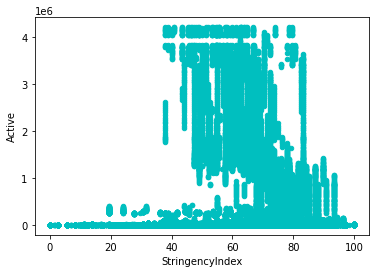

In [ ]:
plot1= my_complete_df.plot(x ="StringencyIndex", y = "Active", kind ="scatter", c="c")
plt.plot(StringencyIndex, intercept + slope*StringencyIndex, "b", label="fitted")
plt.show

In [ ]:
my_complete_df[date_list[-1]].sort_values(ascending = False).head(10)

,Date,CountryCode,StringencyIndex,Country_Region,Population,Confirmed,Deaths,Recovered,Active
0,2020-01-22,ABW,0.0,Netherlands,106766.0,0,0.0,0.0,0.0
1,2020-01-23,ABW,0.0,Netherlands,106766.0,0,0.0,0.0,0.0
2,2020-01-24,ABW,0.0,Netherlands,106766.0,0,0.0,0.0,0.0
3,2020-01-25,ABW,0.0,Netherlands,106766.0,0,0.0,0.0,0.0
4,2020-01-26,ABW,0.0,Netherlands,106766.0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
60904,2020-09-30,ZWE,NaN,Zimbabwe,14862927.0,7838,228.0,6303.0,1307.0
60905,2020-10-01,ZWE,NaN,Zimbabwe,14862927.0,7850,228.0,6312.0,1310.0
60906,2020-10-02,ZWE,NaN,Zimbabwe,14862927.0,7858,228.0,6322.0,1308.0
60907,2020-10-03,ZWE,NaN,Zimbabwe,14862927.0,7885,228.0,6327.0,1330.0


In [ ]:
world_confirmed_ts_df[['Country/Region', date_list[-1]]].sort_values(by = date_list[-1], ascending = False).head(10)

('1/22/20', '10/4/20')

In [ ]:
#confirmed_df_long.sort_values(by = "Date", ascending = False).head(10)
confirmed_df_long[['Country/Region', "Confirmed"]].sort_values(by = "Confirmed", ascending = False).head(10)

,Country/Region,Confirmed
68338,US,7417845
68072,US,7382341
67806,US,7332297
67540,US,7277791
67274,US,7233042
67008,US,7191637
66742,US,7149537
66476,US,7116225
66210,US,7079803
65944,US,7034931


In [ ]:
### Analysis
confirmed_df_long

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
68357,NaN,West Bank and Gaza,31.952200,35.233200,10/4/20,41498
68358,NaN,Western Sahara,24.215500,-12.885800,10/4/20,10
68359,NaN,Yemen,15.552727,48.516388,10/4/20,2041
68360,NaN,Zambia,-13.133897,27.849332,10/4/20,15052


In [ ]:
date_list = confirmed_df.columns.tolist()[4:]
date_list[0], date_list[-1]

('1/22/20', '10/5/20')

In [ ]:
confirmed_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '9/26/20', '9/27/20', '9/28/20', '9/29/20', '9/30/20', '10/1/20',
       '10/2/20', '10/3/20', '10/4/20', '10/5/20'],
      dtype='object', length=262)

In [ ]:
confirmed_df[confirmed_df['Country_Region'].duplicated()]
#confirmed_df.rename(columns = {'Country/Region' : 'Country_Region'}, inplace = True)
#confirmed_df.rename(columns = {'Province/State' : 'Province_State'}, inplace = True)
#confirmed_df.Country_Region.unique()

,Province_State,Country_Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20


In [ ]:
def sum_all_admins_in_state(df, state):
    
    # query all sub-records of the selected state
    tmp_df = df[df["Country_Region"]==state]
    
    # create a new row which is to sum all statistics of this state, and 
    # assign the summed value of all sub-records to the date_time column of the new row
    sum_row = tmp_df.sum(axis=0)
    
    # assign the constants to the ['Province/State', 'Country/Region', 'Lat', 'Long'] columns; 
    # note that the Province/State column will be renamed from solely the country name to country name + ", Sum".
    sum_row.loc['Province_State'] = "NaN"
    sum_row.loc['Country_Region'] = state + ", Sum"
    sum_row.loc['Lat'] = tmp_df['Lat'].values[0]
    sum_row.loc['Long'] = tmp_df['Long'].values[0]
    
    # append the new row to the original DataFrame, and 
    # remove the sub-records of the selected country.
    df = pd.concat([df, sum_row.to_frame().T], ignore_index=True)
    #display(df[df["Province_State"].str.contains(state + ", Sum")])
    df=df[df['Country_Region'] != state]
    df.loc[df.Country_Region == state+", Sum", 'Country_Region'] = state
    
    return df

In [ ]:
# loop thru all states in the U.S.
for state in confirmed_df.Country_Region.unique():
    confirmed_df = sum_all_admins_in_state(confirmed_df, state)

In [ ]:
confirmed_df.sort_values(by = date_list[-1], ascending = False).head(10)

In [ ]:
world_confirmed_ts_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

In [ ]:
pip install arcgis
from arcgis.gis import GIS
#gis = GIS('home', verify_cert=False)

In [ ]:
time.sleep(3)
for d in date_list:
    clear_output(wait=True)
    top_20_per_d = world_confirmed_ts_df.groupby('Country/Region')[['Country/Region', d]].sum().sort_values(by=d, ascending=False).head(20)
    top_20_per_d.plot(kind='barh', log=True, figsize=(8,6))
    plt.ylabel("Country/Region", labelpad=14)
    plt.xlabel("# of Confirmed Cases (log=True)", labelpad=14)
    plt.title("Chart the confirmed cases per country/region", y=1.02)
    plt.show()
    time.sleep(1)

In [ ]:
for d in date_list:
    map1.clear_graphics()
    map1.remove_layers()
    map1.legend=False
    
    df = confirmed_df[['Country_Region', d]]
    df.rename(columns={d: 'Confirmed'}, inplace=True)
    fc = gis.content.import_data(df, 
                                 {"CountryCode":"Country_Region"},
                                 title="Confirmed cases per country of "+d)

    fset=fc.query()
    fset.sdf.spatial.plot(map_widget=map1,
                          renderer_type="c",
                          method="esriClassifyNaturalBreaks",
                          class_count=13,
                          col="Confirmed",
                          min_value=250,
                          cmap="coolwarm",
                          alpha=0.7)
    map1.legend=True
    time.sleep(3)

NameError: ignored

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

class PolynomialRegressionModel:

    def __init__(self, model_name, polynomial_degree):
        self.__model_name = model_name
        self.__polynomial_degree = polynomial_degree
        self.__model = None

    def train(self, x, y):
        polynomial_features = PolynomialFeatures(degree=self.__polynomial_degree)
        x_poly = polynomial_features.fit_transform(x)
        self.__model = LinearRegression()
        self.__model.fit(x_poly, y)

    def get_predictions(self, x):
        polynomial_features = PolynomialFeatures(degree=self.__polynomial_degree)
        x_poly = polynomial_features.fit_transform(x)
        return np.round(self.__model.predict(x_poly), 0).astype(np.int32)

    def get_model_polynomial_str(self):
        coef = self.__model.coef_
        intercept = self.__model.intercept_
        poly = "{0:.3f}".format(intercept)

        for i in range(1, len(coef)):
            if coef[i] >= 0:
                poly += " + "
            else:
                poly += " - "
            poly += "{0:.3f}".format(coef[i]).replace("-", "") + "X^" + str(i)

        return poly

In [ ]:
usa_overall_confirmed_ts_df = confirmed_df[confirmed_df["Country_Region"] == "US"]
new_usa_confirmed_df = usa_overall_confirmed_ts_df[date_list].T
new_usa_confirmed_df.columns = ["confirmed"]
new_usa_confirmed_df = new_usa_confirmed_df.assign(days=[1 + 
                                               i for i in range(len(new_usa_confirmed_df))])[['days'] + 
                                               new_usa_confirmed_df.columns.tolist()]
new_usa_confirmed_df

,days,confirmed
1/22/20,1,1
1/23/20,2,1
1/24/20,3,2
1/25/20,4,2
1/26/20,5,5
...,...,...
10/1/20,254,7277791
10/2/20,255,7332297
10/3/20,256,7382341
10/4/20,257,7417845


In [ ]:
training_set = new_usa_confirmed_df
x = np.array(training_set["days"]).reshape(-1, 1)
y = training_set["confirmed"]

In [ ]:
regression_model = PolynomialRegressionModel("Cases using Polynomial Regression", 2)
regression_model.train(x, y)

In [ ]:
y_pred = regression_model.get_predictions(x)
y_pred

array([-106669, -108474, -110020, -111307, ..., 7748087, 7811999, 7876170, 7940599], dtype=int32)

In [ ]:
def print_forecast(model_name, model, beginning_day=0, limit=10):

    next_days_x = np.array(range(beginning_day, beginning_day + limit)).reshape(-1, 1)
    next_days_pred = model.get_predictions(next_days_x)

    print("The forecast for " + model_name + " in the following " + str(limit) + " days is:")
    for i in range(0, limit):
        print("Day " + str(i + 1) + ": " + str(next_days_pred[i]))

In [ ]:
print_forecast("Cases using Polynomial Regression", regression_model, 
               beginning_day=len(x), 
               limit=10)

The forecast for Cases using Polynomial Regression in the following 10 days is:
Day 1: 7940599
Day 2: 8005287
Day 3: 8070234
Day 4: 8135440
Day 5: 8200904
Day 6: 8266627
Day 7: 8332609
Day 8: 8398849
Day 9: 8465348
Day 10: 8532106


In [ ]:
import operator

def plot_graph(model_name, x, y, y_pred):

    plt.scatter(x, y, s=10)
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(x, y_pred), key=sort_axis)
    x, y_pred = zip(*sorted_zip)

    plt.plot(x, y_pred, color='m')
    plt.title("Amount of " + model_name + " in each day")
    plt.xlabel("Day")
    plt.ylabel(model_name)
    plt.show()

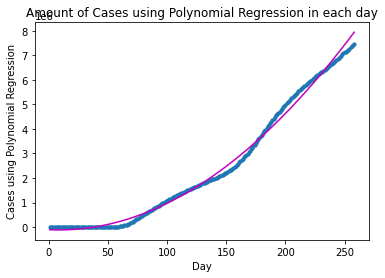

In [ ]:
plot_graph("Cases using Polynomial Regression", x, y, y_pred)

The forecast for Confirmed cases using Polynomial Regression (d=3) in the following 10 days is:
Day 1: 7694895
Day 2: 7747885
Day 3: 7800906
Day 4: 7853956
Day 5: 7907034
Day 6: 7960138
Day 7: 8013265
Day 8: 8066416
Day 9: 8119586
Day 10: 8172776


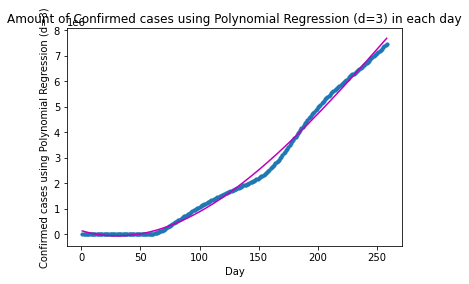

In [ ]:
regression_model = PolynomialRegressionModel("Confirmed cases using Polynomial Regression (d=3)", 3)
regression_model.train(x, y)
y_pred = regression_model.get_predictions(x)
print_forecast("Confirmed cases using Polynomial Regression (d=3)", regression_model, 
               beginning_day=len(x), 
               limit=10)
plot_graph("Confirmed cases using Polynomial Regression (d=3)", x, y, y_pred)

In [ ]:
usa_overall_confirmed_ts_df = confirmed_df[confirmed_df["Country_Region"] == all]
new_usa_confirmed_df = usa_overall_confirmed_ts_df[date_list].T
new_usa_confirmed_df.columns = ["confirmed"]
new_usa_confirmed_df = new_usa_confirmed_df.assign(days=[1 + 
                                               i for i in range(len(new_usa_confirmed_df))])[['days'] + 
                                               new_usa_confirmed_df.columns.tolist()]

ValueError: ignored